# Model of planetary motion
by Timothy Novak

In [14]:
# import functions from the modsim.py module
from modsim import *

The following code initializes the state and system objects for the earth sun system.

In [15]:
# State
#distance in meteres velocity in m/s
st8 = State(xpos = 149597900000, ypos = 0, xvel = 0, yvel = 29000)
#System
#G = m3 kg-1 s-2 masses are in kg masses are in kg radi are in meteres 
sys = System(init = st8,G = 6.67408*10**(-11), M_earth = 5.972*10**24, M_sun =1.989*10**30, R_earth = 6.3781*10**6, R_sun= 6.95700*10**8, t_end = 365.25*24*60*60, sun_pos = Vector(0,0))


,values
init,xpos 149597900000 ypos 0 xvel...
G,6.67408e-11
M_earth,5.972e+24
M_sun,1.989e+30
R_earth,6.3781e+06
R_sun,6.957e+08
t_end,3.15576e+07
sun_pos,"[0 dimensionless, 0 dimensionless]"


The following code describes the functions which constitute the model

In [24]:
#model constituant functions
def get_force(G,M,m,planet_vector, sun_vector):
    """Applies law of universal gravitation and returns the force of gravity as a vector towards the center of the circle in N"""
    #calculates the vector pointing from the planet to the sun
    planet_to_sun_vector = sun_vector-planet_vector
    #takes the direction of the previous vector
    Direction_vector = planet_to_sun_vector/planet_to_sun_vector.mag
    #calculates the acceleration of the planet
    acceleration_mag = (G*M*m)/(planet_vector.mag**2)
    #returns a vector which has the magnitude of the acceleration and a direction towards the star
    return Direction_vector * acceleration_mag

def get_acceleration(G,M,m,planet_vector,sun_vector):
    """Calculates acceleration with F = ma
    F in N
    m in kg
    a in m/s^2"""
    #gets the force and divides by the orbiting body to get the acceleration of the orbing body
    return get_force(G,M,m,planet_vector,sun_vector)/m

def planet_slope_func(st8,t,sys):
    """Describes the change in position and velocity in both the x and y plane between every time step.
    The function takes in a state which describes the old position of the system
    t is the time of the syatem, it is not actually used in calculations however it is a required argument for use with an ODE Solver
    sys is a system object which contains system constants"""
    
    #extracts the values from the state because the ODE solver does not store variables in a state object
    xpos,ypos,xvel,yvel= st8
    #creates a vector which describes the position of the planet
    planet_pos = Vector(xpos,ypos)
    
    #describes a system of differential equations which explain the changes in the system
    #update the velocity in each direction
    dxveldt = get_acceleration(sys.G, sys.M_sun, sys.M_earth, planet_pos,sys.sun_pos).x
    dyveldt = get_acceleration(sys.G, sys.M_sun, sys.M_earth, planet_pos,sys.sun_pos).y
    
    #update the position in each direction
    dxposdt = xvel
    dyposdt = yvel
    
    #returns the change in the state variables
    return dxposdt,dyposdt,dxveldt,dyveldt


The following code runs the simulation and plots the results

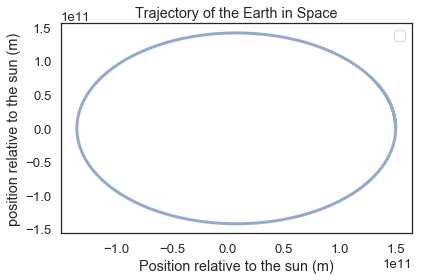

In [25]:
#runs an ODE solver to run a simulation and restricts the ODE solver to taking steps with a maximum size of one day
results,details = run_ode_solver(sys,planet_slope_func, max_step=60*60*24)

#plots the results
plot(results.xpos,results.ypos)
decorate(title = "Trajectory of the Earth in Space", xlabel = "Position relative to the sun (m)", ylabel = "position relative to the sun (m)")
